# Simple Example

Below we show some simple artificial examples of the pyroc library.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pyroc import ROC, bootstrap_roc, compare_bootstrap, compare_binary

%matplotlib inline

## Basic usage

Given the ground truth and the predictions, how to create an ROC plot.

ROC AUC: 0.6667


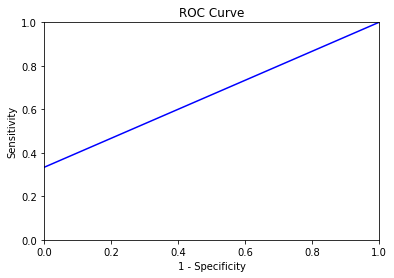

In [2]:
ground_truth = [0, 0, 1, 1, 1]
predictions = [0.1, 0.3, 0.2, 0.3, 0.4]

roc = ROC(ground_truth, predictions)

print(f'ROC AUC: {roc.auc:.4f}')

roc.plot()
plt.show()

## Bootstrapping ROC curve

Average ROC AUC: 0.4737 +/- 0.0598


/home/noud/share/miniconda/envs/pyroc/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


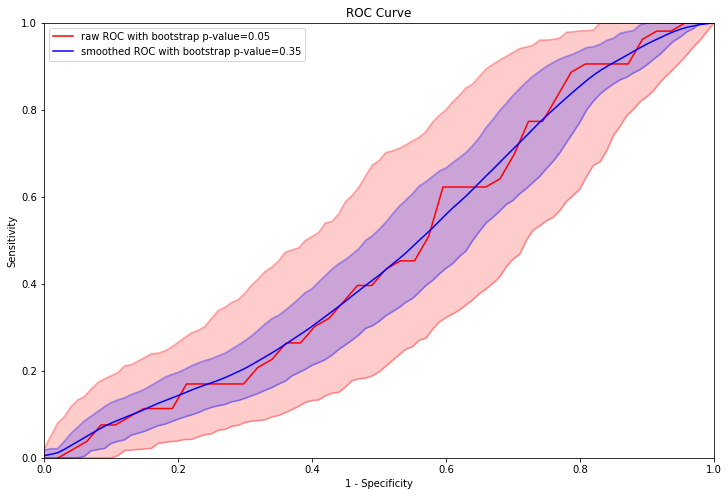

In [3]:
ex_rng = np.random.RandomState(37)

num = 100

ex_gt = ex_rng.binomial(1, 0.5, num)
ex_est = ex_rng.rand((num))

ex_roc = ROC(ex_gt, ex_est)
ex_roc_list = bootstrap_roc(ex_roc, seed=37)
ex_roc_auc_list = [roc.auc for roc in ex_roc_list]

print(f'Average ROC AUC: {np.mean(ex_roc_auc_list):.4f} +/- {np.var(ex_roc_auc_list)**.5:.4f}')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ex_roc.plot(bootstrap=True,
            num_bootstraps=1000,
            seed=37,
            num_bootstrap_jobs=-1,
            color='red',
            p_value=0.05,
            mean_roc=False,
            plot_roc_curve=True,
            show_min_max=False,
            label='raw ROC with bootstrap p-value=0.05',
            ax=ax)
ex_roc.plot(bootstrap=True,
            num_bootstraps=1000,
            seed=37,
            num_bootstrap_jobs=-1,
            color='blue',
            p_value=0.35,
            mean_roc=True,
            show_min_max=False,
            label='smoothed ROC with bootstrap p-value=0.35',
            ax=ax)
ax.legend()

fig.show()

## Comparing ROC curves with bootstrapping

Bootstrap ex_roc1 < ex_roc2        : (True, 0.04163033112351611)
Binary ex_roc1 < ex_roc2           : (False, 0.053)
Bootstrap ex_roc2 < ex_roc1        : (False, 0.9583696688764839)
Binary ex_roc2 < ex_roc1           : (False, 0.947)
ex_roc1 <  ex_roc2 (p-value = 0.05): True
ex_roc1 <= ex_roc2 (p-value = 0.05): True
ex_roc1 >  ex_roc2 (p-value = 0.05): False
ex_roc1 >= ex_roc2 (p-value = 0.05): False
ex_roc1 == ex_roc2 (p-value = 0.05): False


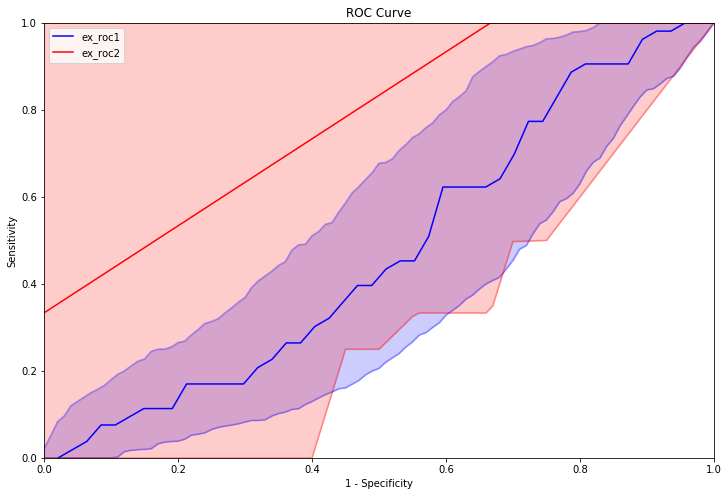

In [4]:
ex_rng = np.random.RandomState(37)

num = 100

ex_gt = ex_rng.binomial(1, 0.5, num)
ex_est = ex_rng.rand((num))

ex_roc1 = ROC(ex_gt, ex_est)
ex_roc2 = ROC([True, True, True, False, False, False], [.9, .8, .35, .4, .3, .1])

print('Bootstrap ex_roc1 < ex_roc2        :', compare_bootstrap(ex_roc1, ex_roc2, seed=37))
print('Binary ex_roc1 < ex_roc2           :', compare_binary(ex_roc1, ex_roc2, seed=37))
print('Bootstrap ex_roc2 < ex_roc1        :', compare_bootstrap(ex_roc2, ex_roc1, seed=37))
print('Binary ex_roc2 < ex_roc1           :', compare_binary(ex_roc2, ex_roc1, seed=37))
print('ex_roc1 <  ex_roc2 (p-value = 0.05):', ex_roc1 < ex_roc2)
print('ex_roc1 <= ex_roc2 (p-value = 0.05):', ex_roc1 <= ex_roc2)
print('ex_roc1 >  ex_roc2 (p-value = 0.05):', ex_roc1 > ex_roc2)
print('ex_roc1 >= ex_roc2 (p-value = 0.05):', ex_roc1 >= ex_roc2)
print('ex_roc1 == ex_roc2 (p-value = 0.05):', ex_roc1 == ex_roc2)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ex_roc1.plot(bootstrap=True, ax=ax, color='blue', label='ex_roc1')
ex_roc2.plot(bootstrap=True, ax=ax, color='red', label='ex_roc2')
ax.legend()

fig.show()